# An all-sky ALMA Archive search for some target lines within a given redshift range
## (Authors: Toby Brown and Nathan Brunetti)

## Uses the `ALMAxmatch` module's `runQueriesWithLines` method

### Import the `ALMAxmatch` module
- This requires installing the latest code branch for the `astroquery` moduledue to a bug in the release date format that should be fixed in the next release.

## Install  "bleeding edge" version of `astroquery`
In the short-term it is necessary to install the "bleeding edge" version of `astroquery` to avoid a bug in the release date column. To do so, run the following commands in a terminal in a directory you do not mind downloading ~100 MB of code
```
git clone https://github.com/astropy/astroquery.git
cd astroquery
python setup.py build
python setup.py install
```

### Import the `ALMAxmatch` tool

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))
from ALMAxmatch import archiveSearch

## 1. Define lines of interest and redshift range

### Lines:

1. $^{12}$CO ($J=1-0$) @ 115.27120180 GHz rest frequency
2. $^{12}$CO ($J=2-1$) @ 230.538 GHz rest frequency

In [2]:
# rest frame frequencies
rf_12CO_10 = [115.27120180] # 12CO J=1-0
rf_12CO_21 = [230.538] # 12CO J=2-1

rest_frequencies = [rf_12CO_10] # list of rest frequencies
lineNames = ['CO(1-0)'] # column names for observed boolean flags 

### Search Redshift Range:

Search for the following lines at $0.01 \leq z \leq 0.06$:

In [3]:
# search redshift range
redshift_range = [0.01,0.06]

## 2. Run the archive search


### What does `runQueriesWithLines` do?
1. Calculate min and max frequencies for the target lines in the redshift range
1. Query the service using `astroquery.alma.Alma.query` with the min and max frequencies for the target lines and return a table object, selecting only science data
1. Cross-match these observations with NED, returning the results in the following astropy tables:

    `archiveSearch.queryResults`: ALMA Archive information for observations that match a NED object name and have a redshift, with flags for each line specifying if the spectral windows cover the line frequency at the object's redshift.

    `archiveSearch.queryResultsNoNED`: Observations that did not have a match in NED, based on name.

    `archiveSearch.queryResultsNoNEDz`: Observations that match a NED object name but do not have a redshift.

In [4]:
# Initialise the search object
allSkyLinesQuery = archiveSearch(allSky=True)

**Warning** Running this query takes about 12 minutes to run, so make sure you have something else to do while you wait (ALMA archive pro-tip: use this time to give your mom a quick call, you know it's been too long).

In [13]:
allSkyLinesQuery.runQueriesWithLines(restFreqs=rf_12CO_10,
                                     redshiftRange=redshift_range,
                                     lineNames='CO(1-0)', science=True)

TypeError: len() of unsized object

In [7]:
allSkyLinesQuery.queryResults['All sky'].show_in_notebook()

idx,Project code,ALMA source name,ALMA RA,ALMA Dec,Galactic longitude,Galactic latitude,Band,Spatial resolution,Array,Mosaic,Integration,Release date,Frequency support,Velocity resolution,Observation date,PI name,SB name,Proposal authors,Continuum sensitivity,PWV,Group ous id,Member ous id,Asdm uid,Project title,Project type,Scan intent,Field of view,Largest angular scale,QA2 Status,COUNT,Science keyword,Scientific category,ASA_PROJECT_CODE,Frequency ranges,Frequency resolution,Line sensitivity (10 km/s),Line sensitivity (native),Pol products,ALMA sanitized source name,NED source name,NED RA,NED Dec,NED Redshift,CO(1-0)
,,,deg,deg,deg,deg,,,,,s,,GHz,m / s,,,,,mJy/beam,mm,,,,,,,arcsec,arcsec,,,,,,GHz,kHz,mJy / beam,mJy / beam,,,,degrees,degrees,,
0,2011.0.00099.S,am0318-230,50.168121,-22.931458,214.2399731022091,-56.05795119591095,[3],2.441715486620716,12m,,544.32,2013-05-16,"[96.87..98.75GHz,976.65kHz,2.6mJy/beam@10km/s,109.5uJy/beam@native, XX YY] U [98.23..100.11GHz,976.65kHz,2.6mJy/beam@10km/s,109.5uJy/beam@native, XX YY] U [108.67..110.54GHz,976.65kHz,2.5mJy/beam@10km/s,109.8uJy/beam@native, XX YY] U [110.37..112.25GHz,976.65kHz,2.5mJy/beam@10km/s,109.8uJy/beam@native, XX YY]",2608.475042885617,2012-04-06T22:16:37,"Iono, Daisuke",group 2-B3-EXTENDED,"Kaneko, Hiroyuki; Narayanan, Desika; Espada, Daniel; Tamura, Yoichi; Yun, Min; Hatsukade, Bunyo; Kawabe, Ryohei; Crocker, Alison; Ueda, Junko;",0.054825165901569266,3.688316,,uid://A002/X391d0b/X11e,uid://A002/X3c7a84/X164,Reformation of Cold Molecular Disks in Merger Remnants,S,TARGET,55.69002298522236,16.211233610962047,Y,4,Merging and interacting galaxies,Galaxy evolution,2011.0.00099.S,"[array([96.87, 98.75]), array([ 98.23, 100.11]), array([108.67, 110.54]), array([110.37, 112.25])]","[976.65, 976.65, 976.65, 976.65]","[2.6, 2.6, 2.5, 2.5]","[0.1095, 0.1095, 0.1098, 0.1098]","['XX YY', 'XX YY', 'XX YY', 'XX YY']",AM0318-230,ESO 481- G 022,50.16802,-22.93141,0.035688,True
1,2011.0.00467.S,vv114,16.9467,-17.5069,145.19626782629928,-79.66480613901771,[3],1.2417024280163433,12m,,1814.4,2013-06-06,"[98.52..100.41GHz,976.59kHz,2.2mJy/beam@10km/s,90.7uJy/beam@native, XX YY] U [100.47..102.36GHz,976.59kHz,2mJy/beam@10km/s,83.5uJy/beam@native, XX YY] U [110.77..112.66GHz,976.59kHz,1.9mJy/beam@10km/s,83.7uJy/beam@native, XX YY] U [112.02..113.90GHz,976.59kHz,1.9mJy/beam@10km/s,83.8uJy/beam@native, XX YY]",2570.490189114503,2011-11-06T01:12:08,"Iono, Daisuke",SB3 comp SB3-B3-ext,"Imanishi, Masatoshi; Yun, Min; Sugai, Hajime; Nakanishi, Kouichiro; Hagiwara, Yoshiaki; Motohara, Kentaro; Tateuchi, Ken;",0.04263536759300418,1.335401,,uid://A001/X74/X247,uid://A002/X30cca6/X254,Dense Gas and Starburst/AGN Activities in the Late-stage IR-Bright Merger VV114,S,TARGET WVR,54.82619081624399,28.57050962770474,Y,10,"Merging and interacting galaxies, Inter-Stellar Medium (ISM)/Molecular clouds",Galaxy evolution,2011.0.00467.S,"[array([ 98.52, 100.41]), array([100.47, 102.36]), array([110.77, 112.66]), array([112.02, 113.9 ])]","[976.59, 976.59, 976.59, 976.59]","[2.2, 2.0, 1.9, 1.9]","[0.0907, 0.0835, 0.08370000000000001, 0.0838]","['XX YY', 'XX YY', 'XX YY', 'XX YY']",VV114,IC 1623,16.94658,-17.50703,0.020067,True
2,2011.0.00099.S,am2038-382,310.3078,-38.193439,4.026253978372779,-37.18289782610838,[3],1.4710481867639444,12m,,1088.64,2013-08-24,"[98.85..100.72GHz,976.47kHz,2.7mJy/beam@10km/s,112.7uJy/beam@native, XX YY] U [100.23..102.10GHz,976.47kHz,2.4mJy/beam@10km/s,101.1uJy/beam@native, XX YY] U [110.93..112.80GHz,976.47kHz,2.3mJy/beam@10km/s,101.4uJy/beam@native, XX YY] U [112.68..114.55GHz,976.47kHz,2.3mJy/beam@10km/s,101.4uJy/beam@native, XX YY]",2555.484811983485,2012-05-04T07:33:51,"Iono, Daisuke",group6-B3-EXTENDED,"Kaneko, Hiroyuki; Narayanan, Desika; Espada, Daniel; Tamura, Yoichi; Yun, Min; Hatsukade, Bunyo; Kawabe, Ryohei; Crocker, Alison; Ueda, Junko;",0.05191067483416365,1.3450516,,uid://A002/X391d0b/X124,uid://A002/X3f6a86/X7fb,Reformation of Cold Molecular Disks in Merger Remn

In [9]:
print("There are", len(allSkyLinesQuery.queryResults['All sky']), "observations of 12CO(1-0) in the target redshift range")

There are 232 observations of 12CO(1-0) in the target redshift range


Because our search results have accompanying archival and NED data, we can take a better look

## 3. Take a look at your results

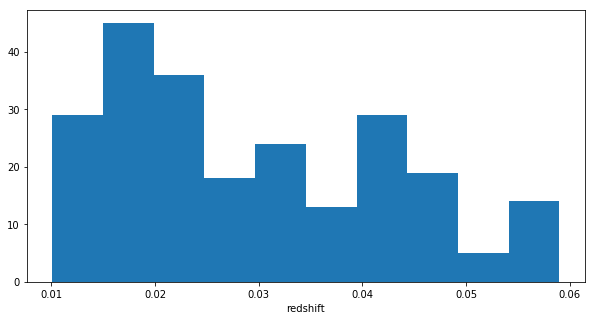

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(allSkyLinesQuery.queryResults['All sky']['NED Redshift'])
plt.xlabel("redshift")
plt.show()


In [12]:
_CO_observed = allSkyLinesQuery.queryResults['All sky'][lineNames[0]]
_13CO_observed = allSkyLinesQuery.queryResults['All sky'][lineNames[1]]

perfomance = [len(C18O_observed[C18O_observed==True]),
               len(_13CO_observed[_13CO_observed==True]),
               len(_12CO_observed[_12CO_observed==True])]

xpos = [0,1,2]

plt.figure(figsize=(10,5))
plt.bar(xpos, perfomance)
plt.xticks(xpos, lineNames, fontsize=15)
plt.ylabel('No. Observations')

IndexError: list index out of range

### Group by NED source name

In [ ]:
observations = allSkyLinesQuery.queryResults['All sky'].group_by('NED source name')

Iterate over the group sub-tables and corresponding keys with:

In [ ]:
n = 0
for key, group in zip(observations.groups.keys, observations.groups):
    # if all three lines detected
    if ((True in group['12CO J=1-0']) & 
        (True in group['13CO J=1-0']) &
        (True in group['C18O J=1-0'])):
        
        print('****** {0} *******'.format(key['NED source name']))
        display(group)
        print('')
        n= n+1


In [ ]:
print("There are", n, "galaxies in the target redshift range with 12CO, 13CO, AND C18O observations.")